# Лабораторная работа по заданию №  8. Практический анализ современных алгоритмов

## Глава 4 - Разделяй и властвуй. 4.1. Задача поиска максимального подмассива

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math

### Реализация функции

In [2]:
def find_max_crossing_subarray(A, low, mid, high):
    left_sum = float("-inf")
    summ = 0
    for i in reversed(range(low, mid+1)):
        summ = summ+A[i-1]
        if summ > left_sum:
            left_sum = summ
            max_left = i
    right_sum = float("-inf")
    summ=0
    for j in range(mid+1, high+1):
        summ=summ+A[j-1]
        if summ>right_sum:
            right_sum=summ
            max_right=j
    return (max_left, max_right, left_sum+right_sum)

def find_maximum_subarray(A, low, high):
    if high==low:
        return (low, high, A[int(low)-1])
    else:  
        mid=(low+high)//2
        left_low, left_high, left_sum = find_maximum_subarray(A, low, mid)
        right_low, right_high, right_sum = find_maximum_subarray(A, mid+1, high)
        cross_low, cross_high, cross_sum = find_max_crossing_subarray(A, low, mid, high)
        if (left_sum>=right_sum) and (left_sum>=cross_sum):
            return (left_low, left_high, left_sum)
        elif (right_sum>=left_sum) and (right_sum>=cross_sum):
            return right_low, right_high, right_sum
        else:
            return cross_low, cross_high, cross_sum

### Объявление функции для визуализации

In [107]:
def visualize_result(A, left, right):
    plt.rcParams['figure.figsize'] = [14, 6]
    fig, ax = plt.subplots()
    ax.plot([i+1 for i in range(len(A))], A, color='#FFB6C1', label='Исходные данные')
    ax.plot([i+1 for i in range(len(A))], [0 for i in range(len(A))], color='blue', linewidth=1, label='Нулевая линия')
    ax.set(xlabel='Дни', ylabel='Изменение в цене',title='Визуализация изменений в цене')
    ax.axvline(x=left, linewidth=2, color='purple', linestyle='dashed', label='Максимальный подмассив')
    ax.axvline(x=right, linewidth=2, color='purple', linestyle='dashed')
    leg = plt.legend()
    ax.grid()
    plt.show()

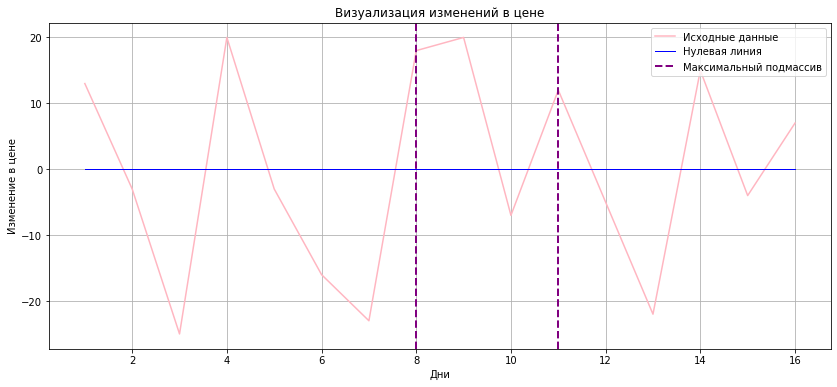

In [109]:
#пример из книги
A=[13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
resut=find_maximum_subarray(A, 1, len(A))
left=resut[0]
right=resut[1]
summ=resut[2]
visualize_result(A, left, right)

Массив значений:
[-16   0  18   7 -13 -14  -7 -14  19  -1  10   5  -4  12 -11 -18  16  -6
 -16  19]


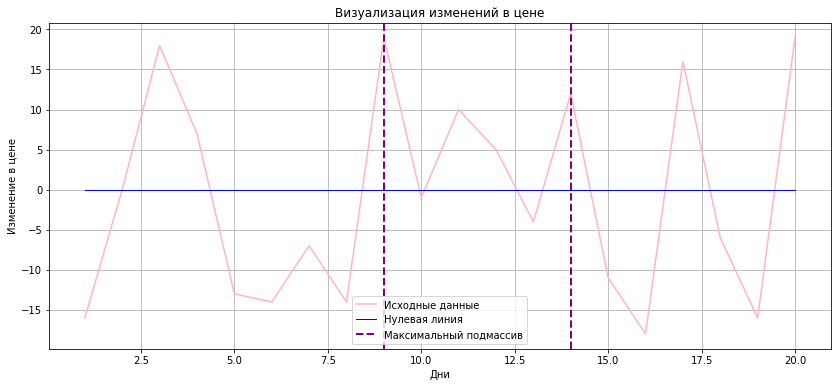

In [176]:
#проверка на случайном массиве
A=np.random.randint(-20, 20, 20)
print('Массив значений:')
print(A)
resut=find_maximum_subarray(A, 1, len(A))
left=resut[0]
right=resut[1]
summ=resut[2]
visualize_result(A, left, right)

## Алгоритм работает корректно, можно приступать к замерам временной сложности 

In [162]:
time_array=[]
number_array=np.arange(10,5000,10)
for i in number_array:
    A=np.random.uniform(-20, 20, i)
    res_time=0
    for t in range(5):
        start_time = time.time()
        resut=find_maximum_subarray(A, 1, len(A))
        current_time=time.time() - start_time
        res_time=res_time+current_time
    mean_time=res_time/5
    time_array.append(mean_time)

## Визуализация временной сложности алгоритма

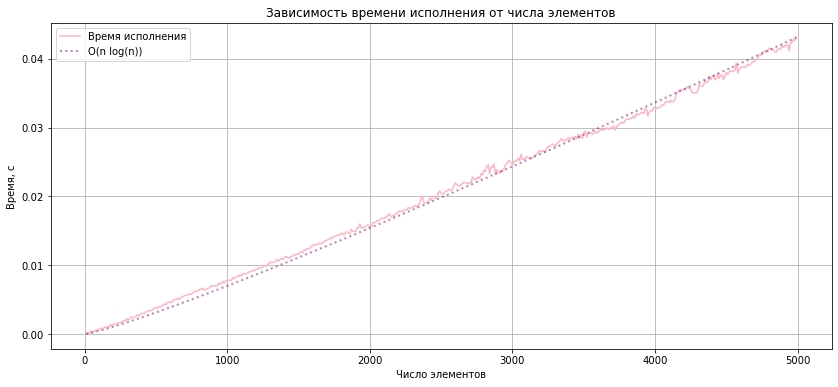

In [164]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()

data3 = np.array(number_array)*np.log(np.array(number_array))
ax2 = ax.twinx()  
lns2=ax2.plot(number_array, data3, color='purple', linestyle='dotted', linewidth=2, alpha = 0.5, label = 'O(n log(n))')
ax2.tick_params(axis='y')
ax2.axis('off')

lns1=ax.plot(number_array, time_array, color='#FFB6C1', label = 'Время исполнения')
ax.set(xlabel='Число элементов', ylabel='Время, с',title='Зависимость времени исполнения от числа элементов')
ax.grid()

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.show()

## Глава 15 - Динамическое программирование. 15.1. Разрезание стержня

### Таблица верной стоимости от разбиения стержня длины i

| i | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
|r[i]| 1 | 5 | 8 | 10 | 13 | 17 | 18 | 22 | 25 | 30 |
|Длина частей| нет | нет | нет | 2+2 | 2+3 | нет | 1+6 (2+2+3) | 2+6 | 3+6 | нет |

## Рекурсивная нисходящая реализация

In [177]:
p=[1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
def cut_rod(p, n):
    if n==0:
        return 0        
    q=float("-inf")
    for i in range(1, n+1):
        q=max(q, p[i-1]+cut_rod(p, n-i))
    return q
print(cut_rod(p, 3))

8


## Применение динамического программирования для оптимального разрезания стержня

## Нисходящая реализация с зпоминанием

In [14]:
def memorized_cut_rod_aux(p, n, r):
    if r[n-1]>=0:
        return r[n-1]
    if n==0:
        q=0
    else:
        q=float("-inf")
        for i in range (1, n+1):
            q=max(q, p[i-1]+memorized_cut_rod_aux(p, n-i, r))
    r[n-1] = q
    return q

def memoized_cut_rod(p, n):
    r=np.arange(0, n).astype('float')
    for i in range (n):
        r[i]=float("-inf")
    return memorized_cut_rod_aux(p, n, r)

print(memoized_cut_rod(p, 3))        

8.0


## Восходящая реализация

In [178]:
def bottom_up_cut_rod(p, n):
    r = [0 for _ in range(n)]
    for i in range(n):
        best_p = float("-inf")
        for j in range(i):
            best_p = max(best_p, p[j + 1] + r[i - (j + 1) - 1])
        r[i] = best_p
    return r[n - 1]
print(bottom_up_cut_rod(p, 3))   

8


## Восстановление решения

In [100]:
def extended_bottom_up_cut_rod(p, n):
    r, s = [0 for _ in range(n)], [1 for _ in range(n)]
    for i in range(n):
        best_p = 1
        for j in range(i):
            if p[j + 1] + r[i - (j + 1) - 1] > best_p:
                best_p = p[j + 1] + r[i - (j + 1) - 1]
                s[i] = j+ 2  
        r[i] = best_p
    return r, s
print(extended_bottom_up_cut_rod(p, 10))                

([1, 5, 8, 10, 13, 17, 18, 22, 25, 30], [1, 2, 3, 2, 2, 6, 2, 2, 3, 10])


## Оценка временной сложности разных реализаций алгоритма

### Рекурсивная нисходящая реализация

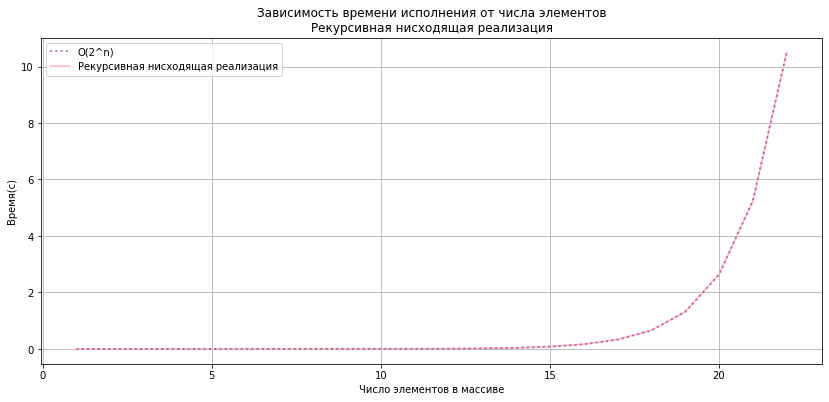

In [181]:
number_array=np.arange(1,23,1)
cut_rod_time=[]
for i in number_array:
    res_time=0
    p=np.sort(np.random.randint(1, 3*i, i))
    for t in range(5):
        start_time = time.time()
        resut=cut_rod(p, i)
        current_time=time.time() - start_time
        res_time=res_time+current_time
    mean_time=res_time/5
    cut_rod_time.append(mean_time)
    
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()

data2 = 2**np.array(number_array)
ax2 = ax.twinx()  
lns1=ax2.plot(number_array, data2, color='purple', linewidth=2, linestyle='dotted', alpha = 0.5, label = 'O(2^n)')
ax2.tick_params(axis='y')
ax2.axis('off')

lns2=ax.plot(number_array, cut_rod_time, color='#FFB6C1', label = 'Рекурсивная нисходящая реализация')
ax.set(xlabel='Число элементов в массиве', ylabel='Время(с)',title='Зависимость времени исполнения от числа элементов\nРекурсивная нисходящая реализация')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
plt.show()

### Нисходящая реализация с запоминанием, восходящая реализация

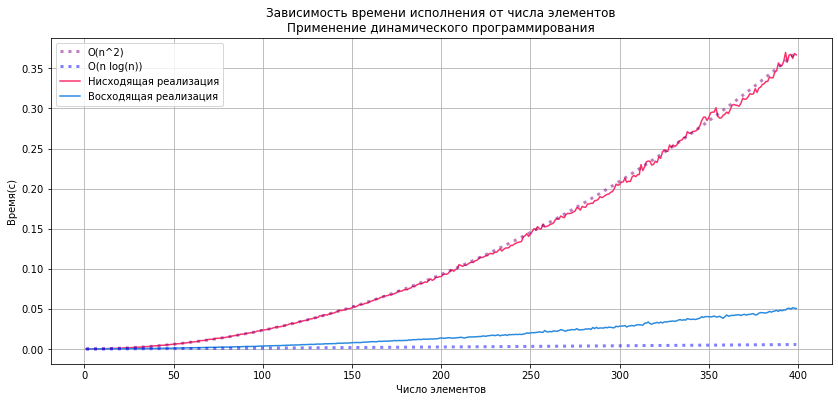

In [180]:
number_array=np.arange(1,400,1)
cut_rod_time=[]
memoized_cut_rod_time=[]
bottom_up_cut_rod_time=[]
for i in number_array:
    res_time=0
    p=np.sort(np.random.randint(1, 3*i, i))
    for t in range(5):
        start_time = time.time()
        resut=memoized_cut_rod(p, i)
        current_time=time.time() - start_time
        res_time=res_time+current_time
    mean_time=res_time/5
    memoized_cut_rod_time.append(mean_time)
    res_time=0
    for t in range(5):
        start_time = time.time()
        resut=bottom_up_cut_rod(p, i)
        current_time=time.time() - start_time
        res_time=res_time+current_time
    mean_time=res_time/5
    bottom_up_cut_rod_time.append(mean_time)

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()

data2 = np.array(number_array)**2
data3 = np.array(number_array)*np.log(np.array(number_array))
ax2 = ax.twinx()  
lns1=ax2.plot(number_array, data2, color='purple', linestyle='dotted', linewidth=3, alpha = 0.5, label = 'O(n^2)')
lns2=ax2.plot(number_array, data3, color='blue', linestyle='dotted', linewidth=3, alpha = 0.5, label = 'O(n log(n))')
ax2.tick_params(axis='y')
ax2.axis('off')

lns3=ax.plot(number_array, memoized_cut_rod_time, color='#FA336C', label='Нисходящая реализация')
lns4=ax.plot(number_array, bottom_up_cut_rod_time, color='#2A8BDF', label='Восходящая реализация')
ax.set(xlabel='Число элементов', ylabel='Время(с)',title='Зависимость времени исполнения от числа элементов\nПрименение динамического программирования')

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
plt.show()